In [1]:
# # Image segmentation with Segment Anything Model
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor

In [2]:
# Visualizer functions
def show_mask(mask, ax):
    color = np.array([30/255, 144/255, 255/255, 0.6])
    
    h, w = mask.shape[-2:]
    
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
# Loading and preparing a model
# Load the SAM model with pre-trained weights
sam_checkpoint = "checkpoints/sam/sam_vit_b_01ec64.pth"

model_type = "vit_b"

device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)
predictor = SamPredictor(sam)

In [5]:
# Load the image
image = cv2.imread('data/butterfly.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [6]:
# Conducting and visualizing segmenration
# Define the parameter for the segmentation
input_box = np.array([[20, 10, image.shape[0]-20, image.shape[1]-20]])

# Segmentation using SAM
predictor.set_image(image)

masks, scores, logits = predictor.predict(
    box = input_box,
    multimask_output=False
)

In [7]:
masks = ~masks

In [8]:
def show_res(masks, scores, input_box, image):
    for i, (mask, score) in enumerate(zip(masks, scores)):
        plt.figure(figsize=(10,10))
        plt.imshow(image)
        
        box = input_box[0]
        
        show_mask(mask, plt.gca())
        show_box(box, plt.gca())
        
        print(f"Score: {score:.3f}")
        
        plt.axis('off')
        plt.show()

Score: 1.085


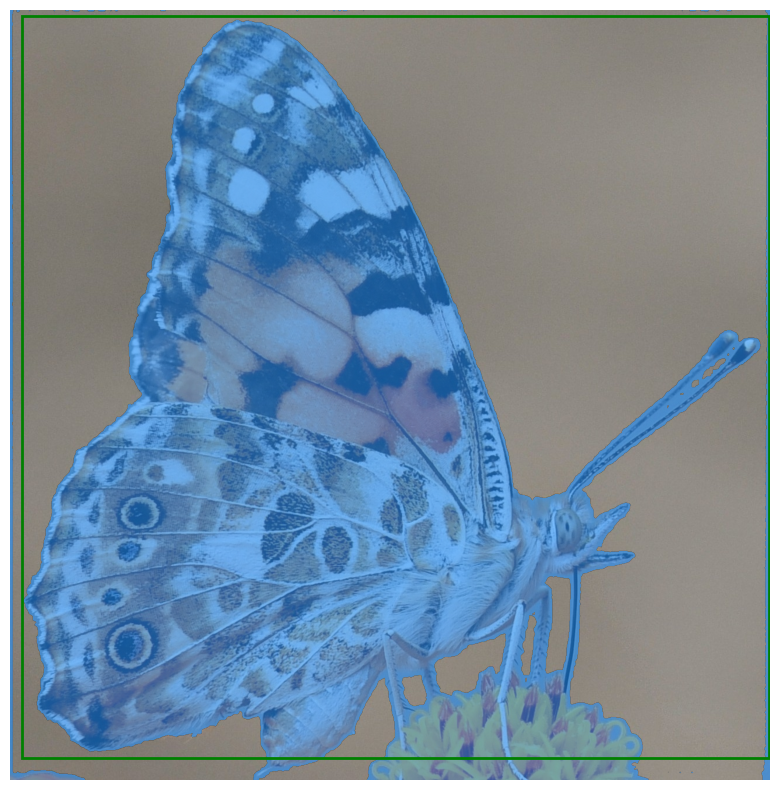

In [9]:
show_res(masks, scores, input_box, image)